In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
'''
Load and transform the data
    - NOTE: if we were interested at this point in predicting a specific target variable, 
            we would omit that variable from the PCA analysis. In this case, I am only
            interested in clustering the data to find natural groupings, so I will include 
            all features.
'''

# Load and split 
data = pd.read_csv('Data/ads_data_clean.csv')
X_df = data.drop(columns=['doi', 'bibcode', 'aff', 'bibstem','arxiv_class'])
X_df.to_csv('Data/ads_data_clean_pca.csv', index=False) # save here just so link can be given on website

# Transform [NOT NEEDED; EACH FEATURE ALREADY SCALED TO STANDARD NORMAL]
# scaler = StandardScaler() 
# X = scaler.fit_transform(PCA_data) ## Scale data
display(X_df)
X = np.array(X_df)

,author_count,citation_count,year,read_count,download_count,Journal_Rank
0,-0.342659,-0.590127,0.399746,15.781133,0.691080,-0.718531
1,0.411490,11.308851,0.191319,5.439945,4.147883,-0.405238
2,-0.342659,-0.588499,1.025027,1.420615,-0.940852,-0.207979
3,0.746667,9.594578,-0.642389,6.174266,3.974185,-0.405238
4,-0.334280,7.654014,-1.267670,3.746686,2.386458,-0.527074
...,...,...,...,...,...,...
987,-0.346849,-0.196967,-1.684524,-0.096406,0.183506,-0.614100
988,-0.149932,0.127003,-1.892951,0.557356,0.672878,-0.422643
989,-0.296572,-0.128592,-1.892951,0.151535,0.377487,-0.440048
990,-0.330090,0.008160,-1.892951,0.280474,0.536624,3.313671


Performing PCA on with N = 3 on data with shape (992, 6)
Principle compondents (3, 6)
 [[ 0.075  0.469 -0.444  0.535  0.539 -0.028]
 [ 0.872  0.231  0.232 -0.003 -0.147 -0.334]
 [ 0.319  0.073  0.081  0.015 -0.008  0.941]]
Transformed data (992, 3):
 [[ 8.35973306e+00 -2.47104341e-01 -5.66207858e-01]
 [ 1.04120828e+01  2.52261086e+00  6.33684885e-01]
 [-4.96111205e-01  4.11750666e-03 -2.37165111e-01]
 ...
 [ 1.05459666e+00 -6.38999919e-01 -6.73248716e-01]
 [ 1.16735793e+00 -1.91396926e+00  2.86064542e+00]
 [ 5.57413319e-01 -5.13786839e-01 -9.54791877e-01]]
Eigenvalues: [2.8345308  1.08556127 0.98978103]
Relative eigenvalues: [0.4708964  0.18034268 0.16443085]


Text(0.5, 0.92, '3D PCA')

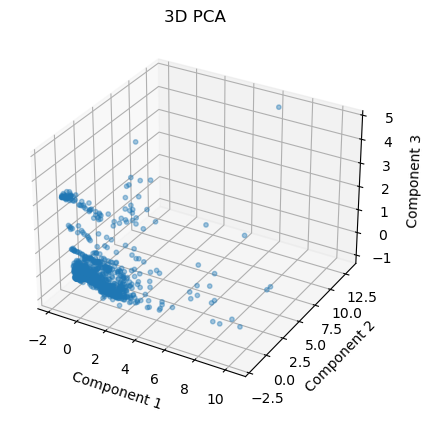

In [3]:
'''
Perform PCA with 3 components
'''
n_components = 3
print(f"Performing PCA on with N = {n_components} on data with shape {X.shape}")

# Perform PCA
model = PCA(n_components) 
model.fit(X)
print(f"Principle compondents {model.components_.shape}\n", np.round(model.components_, 3))
out = model.transform(X) # [N_obs, N_components]
print(f"Transformed data {out.shape}:\n", out)
print("Eigenvalues:", model.explained_variance_)
print("Relative eigenvalues:", model.explained_variance_ratio_)

# Plot principal components
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(out[:,0], out[:,1], out[:,2], s=10, alpha=0.4)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D PCA')

Performing PCA with N = 3 on data with shape (992, 6)
Principle compondents (3, 6)
 [[ 0.075  0.469 -0.444  0.535  0.539 -0.028]
 [ 0.872  0.231  0.232 -0.003 -0.147 -0.334]
 [ 0.319  0.073  0.081  0.015 -0.008  0.941]]
Eigenvalues: [2.8345308  1.08556127 0.98978103]
Relative eigenvalues: [0.4708964  0.18034268 0.16443085]
Transformed data (992, 3):


,Component 1,Component 2,Component 3
0,8.359733,-0.247104,-0.566208
1,10.412083,2.522611,0.633685
2,-0.496111,0.004118,-0.237165
3,10.302010,2.249414,0.560934
4,7.435927,0.994382,-0.113699
...,...,...,...
987,0.693894,-0.563029,-0.843413
988,1.561439,-0.502420,-0.587807
989,1.054597,-0.639000,-0.673249
990,1.167358,-1.913969,2.860645


Text(0.5, 1.0, '2D PCA')

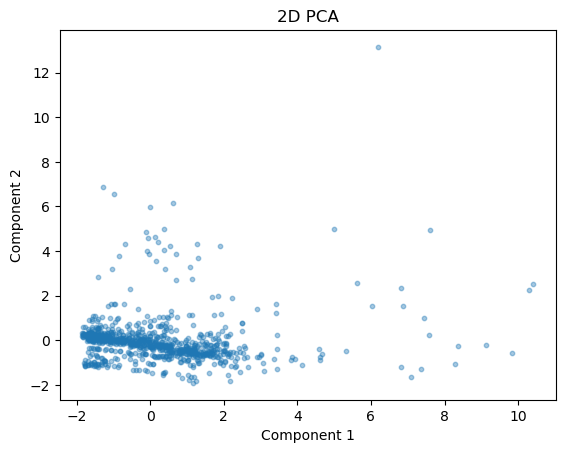

In [9]:
'''
Perform PCA with 2 components
'''
n_components = 3
print(f"Performing PCA with N = {n_components} on data with shape {X.shape}")

# Perform PCA
model = PCA(n_components) 
model.fit(X)
print(f"Principle compondents {model.components_.shape}\n", np.round(model.components_, 3))
out = model.transform(X) # [N_obs, N_components]
print("Eigenvalues:", model.explained_variance_)
print("Relative eigenvalues:", model.explained_variance_ratio_)
out_df = pd.DataFrame(out, columns=['Component 1', 'Component 2', 'Component 3'])
print(f"Transformed data {out.shape}:")
display(out_df)

# Plot principal components
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(out[:,0], out[:,1], s=10, alpha=0.4)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_title('2D PCA')

Text(0.5, 1.0, 'Explained variance as a function of number of components')

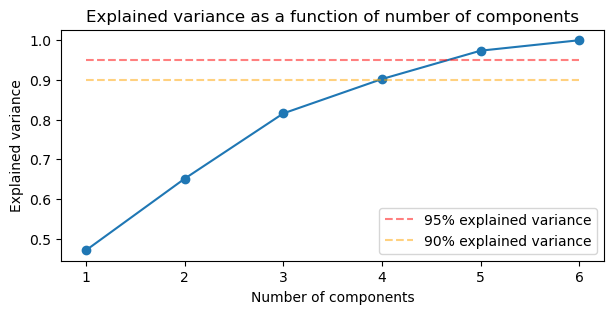

In [5]:
'''
Explore explained variance as a function of number of components
'''

N = [1, 2, 3, 4, 5, 6]
explained_variance = []
for n in N:
    model = PCA(n_components=n)
    model.fit(X)
    explained_variance.append(np.sum(model.explained_variance_ratio_))
plt.figure(figsize=(7, 3))
plt.plot(N, explained_variance, marker='o')
plt.hlines(0.95, 1, 6, colors='r', alpha = 0.5, linestyles='dashed', label='95% explained variance')
plt.hlines(0.90, 1, 6, colors='orange', alpha = 0.5, linestyles='dashed', label='90% explained variance')
plt.legend(loc='lower right')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Explained variance as a function of number of components')

In [14]:
X_df.columns

Index(['author_count', 'citation_count', 'year', 'read_count',
       'download_count', 'Journal_Rank'],
      dtype='object')

In [13]:
'''
Attempt to say something about which of the original features are most important in each PC
'''

# Re-compute PCA with N components equal to the number of features
model = PCA(n_components=6) 
out = model.fit_transform(X)

# Create DF of importance of each feature in each PC      
loadings = pd.DataFrame(model.components_.T,  columns=[f'PC{i}' for i in range(1, len(X_df.columns))], index=X_df.columns)
display(loadings) # THE ABSOLUTE VALUE OF THE LOADING IS THE IMPORTANCE OF THE FEATURE

# Now we can actually say something about which of the original features are most important 
threshold = 0.4 # Find features with loadings above this threshold for each principal component
important_features = {}
for column in loadings.columns:
    important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

ValueError: Shape of passed values is (6, 6), indices imply (6, 5)